In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer, recall_score

# Variables for average classification report


def classification_report_with_accuracy_score(y_true, y_pred):
    #print(classification_report(y_true, y_pred)) # print classification report
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

def classification_report_with_recall_score(y_true, y_pred):
    #print(classification_report(y_true, y_pred)) # print classification report
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return recall_score(y_true, y_pred, average='macro') #return recall

def plot_scores(scores_dict, title, color):
    score_list =[]
    score_list = sorted(scores_dict.items(), key=lambda kv: kv[1], reverse=True)
#print("Cross Validation Scores"+" : "+ str(cv_score_list) + "\n")
    x1, y1 = zip(*score_list)
    plt.figure()
    plt.bar(range(len(x1)),y1,  color=color )
    plt.xticks(range(len(x1)),x1, rotation='vertical')
    plt.title(title)
    plt.ylim([0,1])


X = pd.read_csv('X_feature_engireered.csv')
y = pd.read_csv('y_classification.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=42)



In [2]:
CLASSIFIERS = {"K-NN":KNeighborsClassifier(5), 
          "Decision Tree":DecisionTreeClassifier(max_depth=5),
         "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=3, max_features=5), 
         "Neural Net" : MLPClassifier(alpha=1),          
         "Naive Bayes":  GaussianNB(),
         "SDGCLassifier": linear_model.SGDClassifier(n_iter=100, alpha=0.01, loss='log'),}

cv_score_accuracy = {}
cv_score_recall = {}

test_accuracy= {}
test_recall= {}

for name, clf in  CLASSIFIERS.items():
    originalclass = []
    predictedclass = []
    pipe = Pipeline([('Robust Scaler', RobustScaler()), (name, clf)])
    #np.ravel(y_train,order='C')
    pipe.fit(X_train, y_train)
    cv_score_accuracy[name]= cross_val_score(pipe, X_train, y_train, cv=10,
                                    scoring=make_scorer(classification_report_with_accuracy_score))
    cv_score_recall[name]= cross_val_score(pipe, X_train, y_train, cv=10,
                                    scoring=make_scorer(classification_report_with_recall_score))
    test_accuracy[name] = pipe.score(X_test, y_test)
    test_recall[name] = recall_score(y_test, pipe.predict(X_test))
    #print(name)
    #print("Test Score"+" : "+str(estimator.score(X_test, y_test)))
    #print("Validation Score"+" : "+str(estimator.score(X_val, y_val)))  
    #print(classification_report(originalclass, predictedclass)) 

#print("Cross Validation Scores"+" : "+ str(cv_score) + "\n")

for key in cv_score_recall.keys():
    cv_score_recall[key] = np.average( cv_score_recall[key])
for key in cv_score_accuracy.keys():
    cv_score_accuracy[key] = np.average( cv_score_accuracy[key])



/home/mitro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mitro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mitro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mitro/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mitro/anaconda3/lib/python3.6/site-pac

In [3]:
test_accuracy

{'Decision Tree': 0.7407407407407407,
 'K-NN': 0.7166666666666667,
 'Naive Bayes': 0.4203703703703704,
 'Neural Net': 0.7407407407407407,
 'Random Forest': 0.7222222222222222,
 'SDGCLassifier': 0.737037037037037}

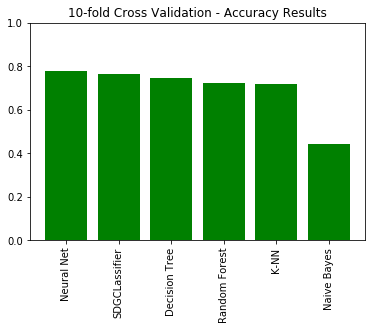

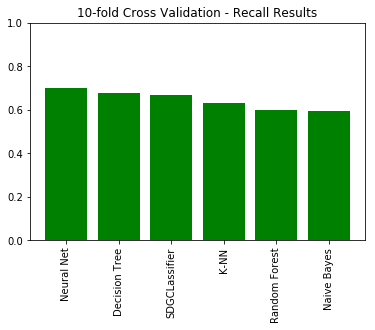

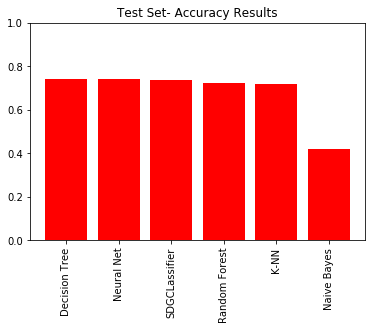

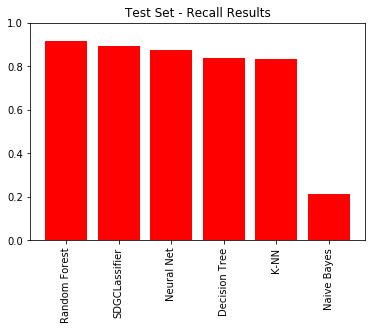

In [4]:
plot_scores(cv_score_accuracy,'10-fold Cross Validation - Accuracy Results', 'green')
plot_scores(cv_score_recall,'10-fold Cross Validation - Recall Results', 'green')

plot_scores(test_accuracy,'Test Set- Accuracy Results', 'red')
plot_scores(test_recall,'Test Set - Recall Results', 'red')


In [5]:
rf = RandomForestClassifier(max_depth=5, n_estimators=3, max_features=5)

In [6]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<Container object of 5 artists>

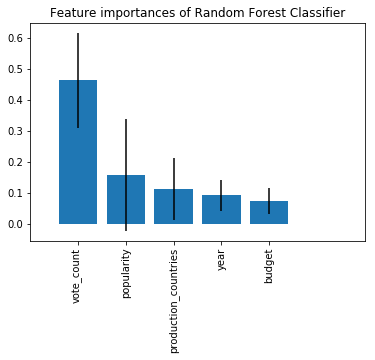

In [7]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices =  np.argsort(importances)[::-1][0:5]

plt.figure()
plt.title("Feature importances of Random Forest Classifier")
plt.xticks(range(5), X.columns[indices], rotation=90)
plt.xlim([-1, 6])
plt.bar(range(5), importances[indices],  color='tab:blue', yerr=std[indices], align="center")
